In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


series = pd.read_csv('zillow-carlifornia .csv', parse_dates=True,
squeeze=True)

In [3]:
series.dtypes

Date                                      object
MedianSoldPrice_AllHomes.California      float64
MedianMortageRate                        float64
UnemploymentRate                         float64
MedianRentalPrice_AllHomes.California    float64
dtype: object

In [4]:
series.columns = [ 'Date', 'MedianSoldPrice', 'MedianMortageRate', 'UnemploymentRate', 'MedianRentalPrice']
series.head()

,Date,MedianSoldPrice,MedianMortageRate,UnemploymentRate,MedianRentalPrice
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


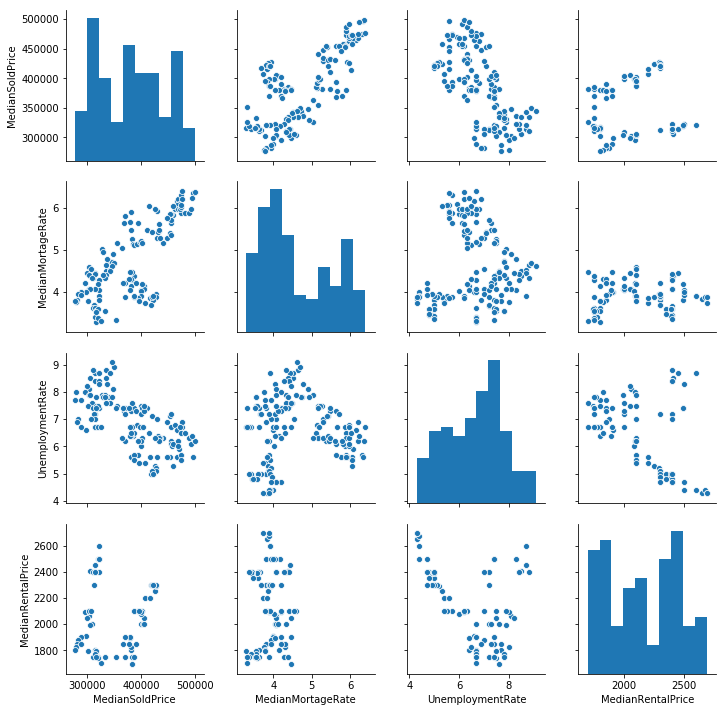

In [5]:
import seaborn as sns
sns.pairplot(series)

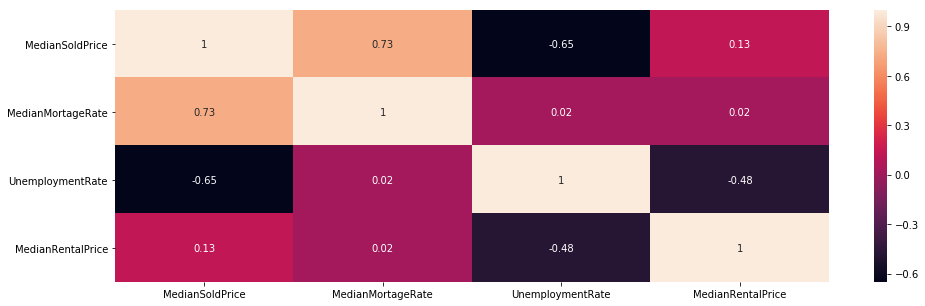

In [6]:
#Correlation Matrix : Quantitative variables
correlation_matrix = series.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
test_set = series[series['MedianSoldPrice'].isna()]

In [8]:
train_set = series[~series['MedianSoldPrice'].isna()]

In [9]:
var_series =train_set[['MedianSoldPrice', 'MedianMortageRate']]

In [11]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [13]:
model = VAR(endog=var_series)
model_fit = model.fit(2)
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Dec, 2019
Time:                     18:25:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.8975
Nobs:                     142.000    HQIC:                   13.7739
Log likelihood:          -1364.92    FPE:                    881513.
AIC:                      13.6893    Det(Omega_mle):         822566.
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     5310.221060      2891.457426            1.837           0.066
L1.MedianSoldPrice           1.666443         0.065369           25.493           0.000
L1.MedianMortageRate  

In [16]:
fc = model_fit.forecast(model_fit.y, steps=len(test_set))
cols = var_series.columns
pred = pd.DataFrame(index=test_set.index,columns=cols)
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]

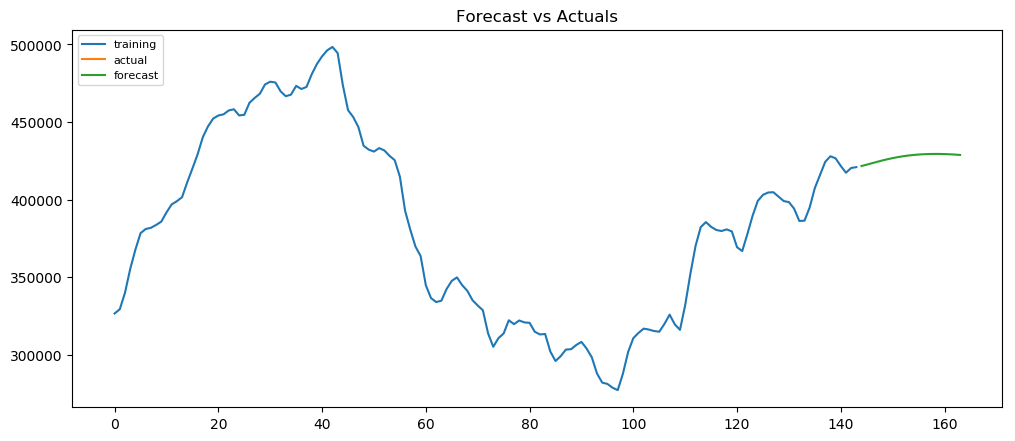

In [20]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_set['MedianSoldPrice'], label='training')
plt.plot(test_set['MedianSoldPrice'], label='actual')
plt.plot(pred['MedianSoldPrice'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [22]:
X = train_set['MedianSoldPrice']
train_size = int(len(X) * 0.85)
train, test = X[:train_size], X[train_size:]
train.head()

0    326752.55
1    329501.50
2    340125.45
3    355329.50
4    367818.15
Name: MedianSoldPrice, dtype: float64

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
model_e_1 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model_e_2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
fit = model_e_1.fit()
pred = fit.forecast(len(test))
fit2 = model_e_2.fit()
pred2 = fit2.forecast(len(test))

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


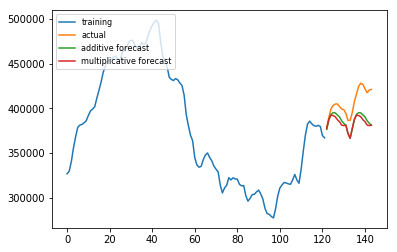

In [25]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [27]:
rmse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
rmse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))
print(rmse1)
print(rmse2)

22419.21356748911
24787.814825313737


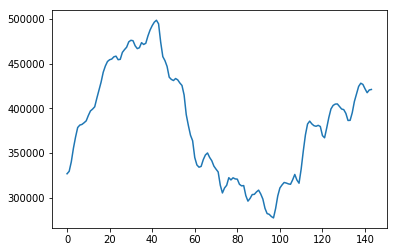

In [15]:
MedianSoldPrice=series.loc[~series['MedianSoldPrice_AllHomes.California'].isna()]['MedianSoldPrice_AllHomes.California']
pyplot.plot(MedianSoldPrice)
pyplot.show()

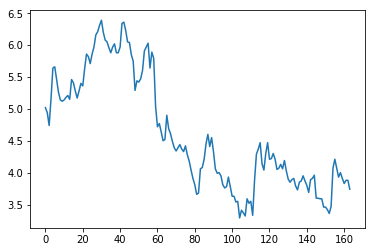

In [8]:
MedianMortageRate=series['MedianMortageRate']
pyplot.plot(MedianMortageRate)
pyplot.show()

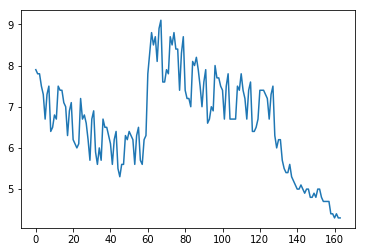

In [9]:
UnemploymentRate=series['UnemploymentRate']
pyplot.plot(UnemploymentRate)
pyplot.show()

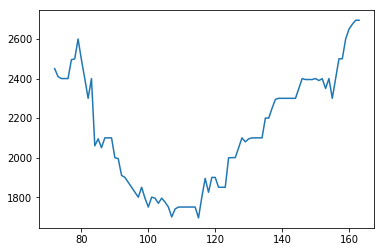

In [10]:
MedianRentalPrice=series['MedianRentalPrice_AllHomes.California']
pyplot.plot(MedianRentalPrice)
pyplot.show()

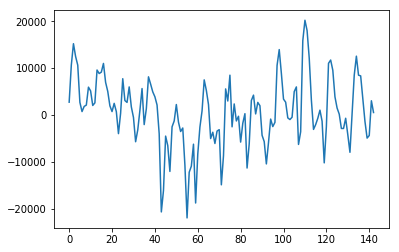

In [16]:
d1 = list()
for i in range(1, len(MedianSoldPrice)):
 value = MedianSoldPrice[i] - MedianSoldPrice[i - 1]
 d1.append(value)

plt.plot(d1) 
pyplot.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


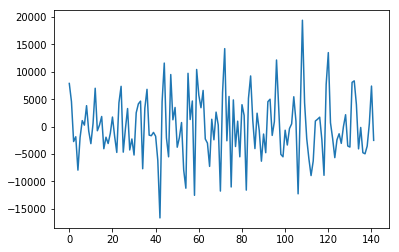

In [18]:
d2 = list()
for i in range(1, len(d1)):
 value = d1[i] - d1[i - 1]
 d2.append(value)

plt.plot(d2) 
pyplot.show()

In [21]:
adf_test(d2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


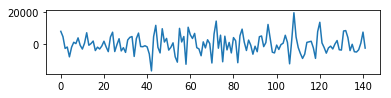

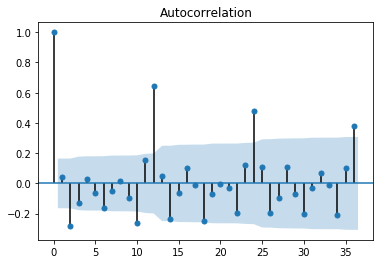

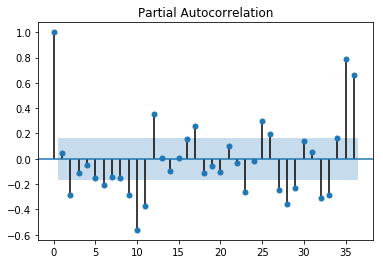

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.subplot(3,1,1)
plt.plot(d2) 
plt.show()
plot_acf(d2,lags=36) 
plt.show()
plot_pacf(d2,lags=36) 
plt.show()

In [22]:
train=MedianSoldPrice

In [27]:
test=series.loc[series['MedianSoldPrice_AllHomes.California'].isna()]['MedianSoldPrice_AllHomes.California']

In [24]:
import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, 
                           start_P=0, seasonal=False,
                           d=2,  trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=2848.224, BIC=2860.047, Fit time=0.122 seconds
Fit ARIMA: order=(0, 2, 0); AIC=2864.973, BIC=2870.885, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=2866.724, BIC=2875.591, Fit time=0.040 seconds
Fit ARIMA: order=(0, 2, 1); AIC=2866.427, BIC=2875.295, Fit time=0.012 seconds
Fit ARIMA: order=(2, 2, 1); AIC=2839.461, BIC=2854.240, Fit time=0.123 seconds
Fit ARIMA: order=(2, 2, 0); AIC=2856.776, BIC=2868.599, Fit time=0.065 seconds
Fit ARIMA: order=(2, 2, 2); AIC=2831.305, BIC=2849.040, Fit time=0.247 seconds
Fit ARIMA: order=(3, 2, 3); AIC=2829.435, BIC=2853.082, Fit time=0.739 seconds
Fit ARIMA: order=(2, 2, 3); AIC=2842.845, BIC=2863.536, Fit time=0.201 seconds
Fit ARIMA: order=(3, 2, 2); AIC=2833.274, BIC=2853.964, Fit time=0.331 seconds
Total fit time: 1.883 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  142
Model:                

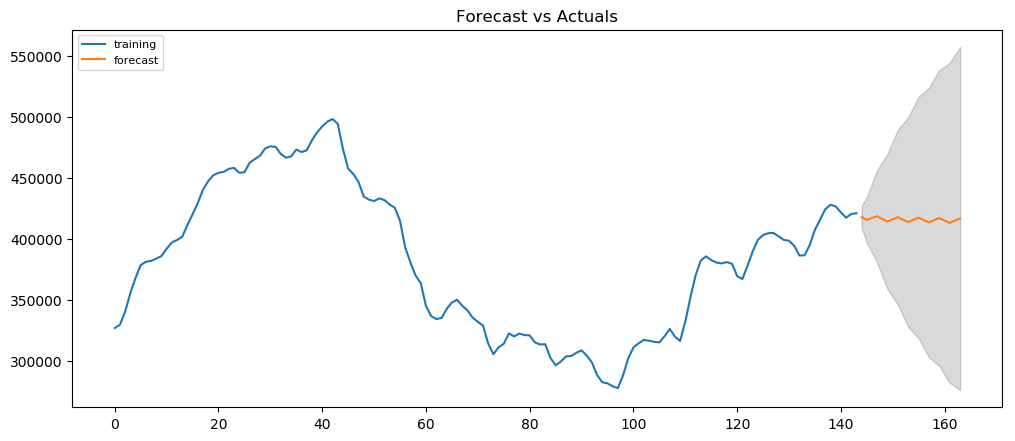

In [28]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
# plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()